In [5]:
import os

os.environ['KAGGLE_API_TOKEN'] = "KGAT_ad1f33e74492ea7e0f719bbaec86a567"


In [6]:
!pip install kaggle


In [7]:
import kagglehub

path = kagglehub.dataset_download("manishkc06/startup-success-prediction")

print("Path to dataset files:", path)


100%|██████████| 64.1k/64.1k [00:00<00:00, 31.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/manishkc06/startup-success-prediction/versions/1


In [8]:
import os

path = "/root/.cache/kagglehub/datasets/manishkc06/startup-success-prediction/versions/1"

print(os.listdir(path))


['startup data.csv']


In [9]:
import pandas as pd

path = "/root/.cache/kagglehub/datasets/manishkc06/startup-success-prediction/versions/1"

df = pd.read_csv(path + "/startup data.csv")

df.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [10]:
df['status'].value_counts()


,count
status,
acquired,597
closed,326


In [11]:
df['success'] = df['status'].apply(lambda x: 1 if x == 'acquired' else 0)


In [12]:
df['success'].value_counts()


,count
success,
1,597
0,326


In [13]:
cols_to_drop = ['Unnamed: 0','Unnamed: 6','id','object_id',
                'name','zip_code','latitude','longitude','city']

df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   labels                    923 non-null    int64  
 2   founded_at                923 non-null    object 
 3   closed_at                 335 non-null    object 
 4   first_funding_at          923 non-null    object 
 5   last_funding_at           923 non-null    object 
 6   age_first_funding_year    923 non-null    float64
 7   age_last_funding_year     923 non-null    float64
 8   age_first_milestone_year  771 non-null    float64
 9   age_last_milestone_year   771 non-null    float64
 10  relationships             923 non-null    int64  
 11  funding_rounds            923 non-null    int64  
 12  funding_total_usd         923 non-null    int64  
 13  milestones                923 non-null    int64  
 14  state_code

In [15]:
cols_to_drop = [
    'status',
    'founded_at',
    'closed_at',
    'first_funding_at',
    'last_funding_at',
    'state_code',
    'state_code.1',
    'category_code'
]

df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [16]:
print(df.columns)


Index(['labels', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'success'],
      dtype='object')


In [17]:
df.isnull().sum()


,0
labels,0
age_first_funding_year,0
age_last_funding_year,0
age_first_milestone_year,152
age_last_milestone_year,152
relationships,0
funding_rounds,0
funding_total_usd,0
milestones,0
is_CA,0


In [18]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(
    df['age_first_milestone_year'].median())

df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(
    df['age_last_milestone_year'].median())


In [19]:
df.drop('labels', axis=1, inplace=True)


In [20]:
X = df.drop('success', axis=1)
y = df['success']


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7891891891891892


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,              # limit tree depth
    min_samples_split=10,     # avoid small splits
    min_samples_leaf=5,       # avoid tiny leaf nodes
    random_state=42
)

rf.fit(X_train, y_train)

# Training accuracy
train_acc = rf.score(X_train, y_train)

# Testing accuracy
test_acc = rf.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.8617886178861789
Testing Accuracy: 0.7891891891891892


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.52      0.66        73
           1       0.76      0.96      0.85       112

    accuracy                           0.79       185
   macro avg       0.83      0.74      0.75       185
weighted avg       0.81      0.79      0.77       185

ROC-AUC Score: 0.742416829745597


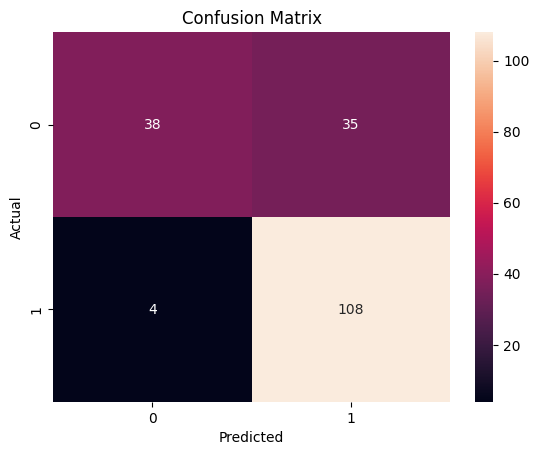

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
import pandas as pd

feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance.head(10))


relationships               0.195818
funding_total_usd           0.122117
age_last_milestone_year     0.118335
age_last_funding_year       0.084620
age_first_milestone_year    0.077085
milestones                  0.076499
age_first_funding_year      0.076138
avg_participants            0.070888
is_top500                   0.050354
funding_rounds              0.029957
dtype: float64


In [31]:
import pickle
pickle.dump(rf, open("random_forest_model.pkl", "wb"))

from google.colab import files
files.download("random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
from google.colab import files
files.download("startup data.csv")


FileNotFoundError: Cannot find file: startup data.csv

In [33]:
df.to_csv("startup data.csv", index=False)
files.download("startup data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>